In [27]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [2]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data  # we takeirst four features.
y = iris.target
feature_names = iris.feature_names

(0.0, 1.8)

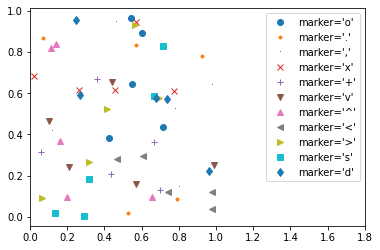

In [3]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8)

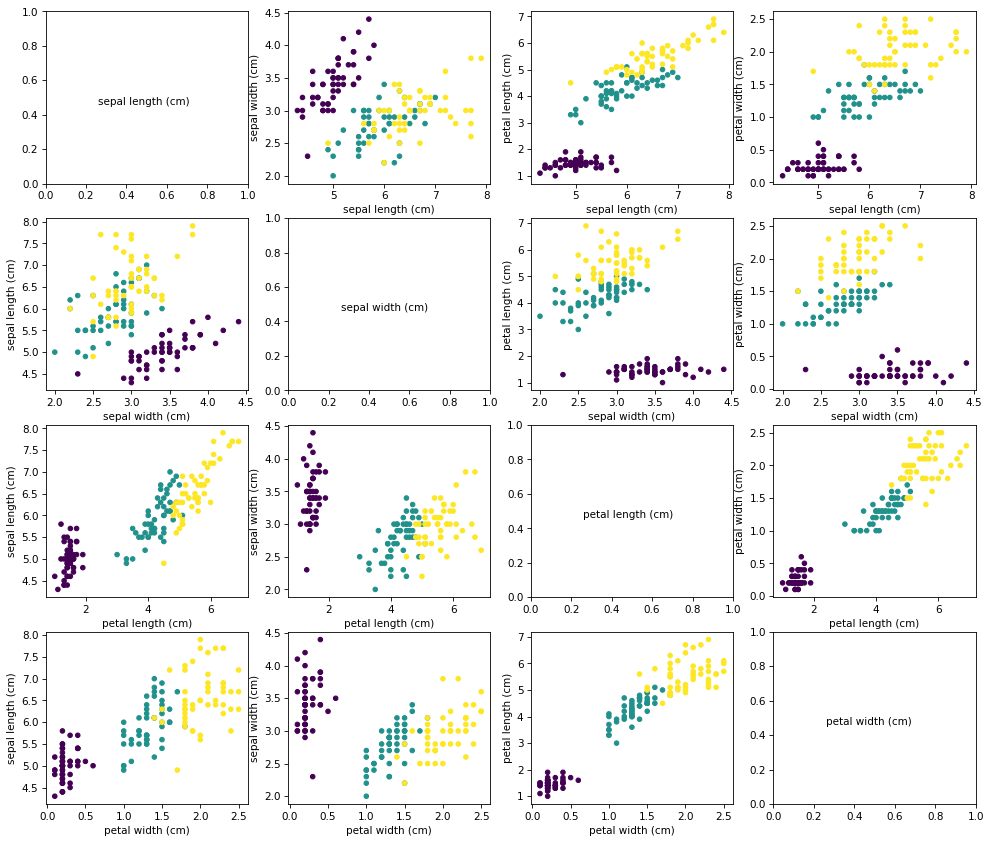

In [56]:
plt.figure(figsize=(16, 14), dpi = 75)
i = 0
for x_ in range(4):
    for y_ in range(4):
        plt.subplot(4, 4, i + 1)
        i += 1
        if x_ == y_:
            plt.text(0.26, 0.46, feature_names[x_])
        else:
            plt.scatter(X[:, x_], X[:, y_], c = y, marker='.', s = 75)
            plt.xlabel(feature_names[x_])
            plt.ylabel(feature_names[y_])
plt.show()

In [16]:
a = 1 # константа, чтобы избежать ситуаций деления на ноль. Для простоты обычно полагают = 1
Kernel = lambda r: 1 / (r + a) # функция, убывающая с ростом аргумента.
window_width = 10 #float(input()) # параметр, задающий "ширину потенциала"
epoch_number = 1 # количество эпох

In [17]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.5, random_state = 10) # разделяем треин и тест данные с коэффициентом test_size с сидом random_state

In [18]:
classes = np.unique(train_y) #  получаем классы
train_x_ = train_x # переобозначеный указатель
charges = np.zeros_like(train_y) # массив параметров, задающих "заряд", т.е. степень важности объекта при классификации
indexes = np.arange(0, len(train_y)) # индексы в массиве классов
train_y_ = train_y # переобозначеный указатель

In [25]:
def minkowski_distances(u, v, p=2):
    return np.sum(((u - v)**p), -1)**(1/p)

def predict(x:np.array):
    test_x = np.copy(x)

    if len(test_x.shape) < 2:
        test_x = test_x[np.newaxis, :]
    u = test_x[:, np.newaxis, :]
    v = train_x_[np.newaxis, :, :]
    weights = charges * Kernel(minkowski_distances(u, v) / window_width)
    table = np.zeros((test_x.shape[0], len(classes)))
    for class_ in classes:
        table[:, class_] = np.sum(weights[:, train_y_ == class_], axis = 1)
    return np.argmax(table, axis = 1)

In [28]:
#fitting
charges[0] = 1
for _ in range(epoch_number):
    for i in range(train_x_.shape[0]):
        if predict(train_x_[i]) != train_y_[i]:
            charges[i] += 1
# удаление всех сэмплов с нулевым "зарядом"
non_zero_mask = charges != 0
train_x_ = train_x_[non_zero_mask, ...]
train_y_ = train_y_[non_zero_mask, ...]
charges = charges[non_zero_mask, ...]
indexes = indexes[non_zero_mask, ...]

In [33]:
# посмотрим на точность
predict_arr = predict(test_x)
print("Accuracy")
print("On test  = ", metrics.accuracy_score(test_y, predict_arr))
print("On train = ", metrics.accuracy_score(train_y, predict(train_x)))
print("On full data: ", metrics.accuracy_score(y, predict(X)))

Accuracy
On test  =  0.96
On train =  0.9866666666666667
On full data:  0.9733333333333334


Charges of points =  [1 1 1 1 1 1 3 3 3 3 4 1 1 1 1]


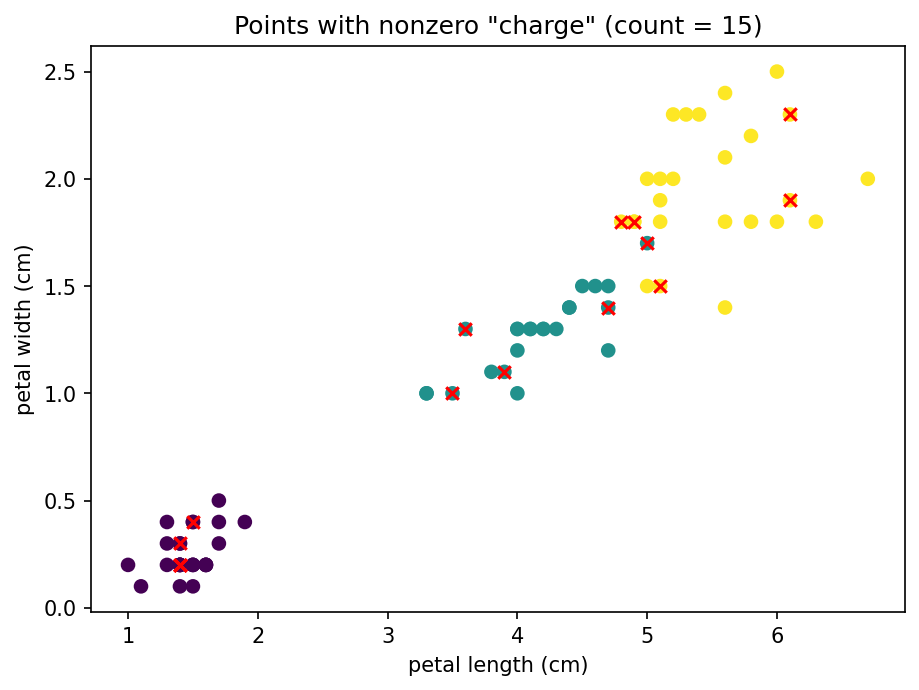

In [60]:
# Выделенные фичи (можно взять другие)
highlighted_features = (2, 3)
highlighted_features_names = (feature_names[highlighted_features[0]], feature_names[highlighted_features[1]])
# Построения графика значений для этих фич и помечание ненулевых зарядов
plt.figure(figsize=(7, 5), dpi=150)
plt.title(f"Points with nonzero \"charge\" (count = {len(indexes)})")
plt.scatter(train_x[:, highlighted_features[0]], train_x[:, highlighted_features[1]], c=train_y) # все точки по классам
plt.scatter(train_x[:, highlighted_features[0]][indexes], train_x[:, highlighted_features[1]][indexes], c='r', marker='x') # точки с ненулевым зарядом
plt.xlabel(highlighted_features_names[0])
plt.ylabel(highlighted_features_names[1])
print("Charges of points = ", charges)

Points with nonzero "charge" (count = 15)


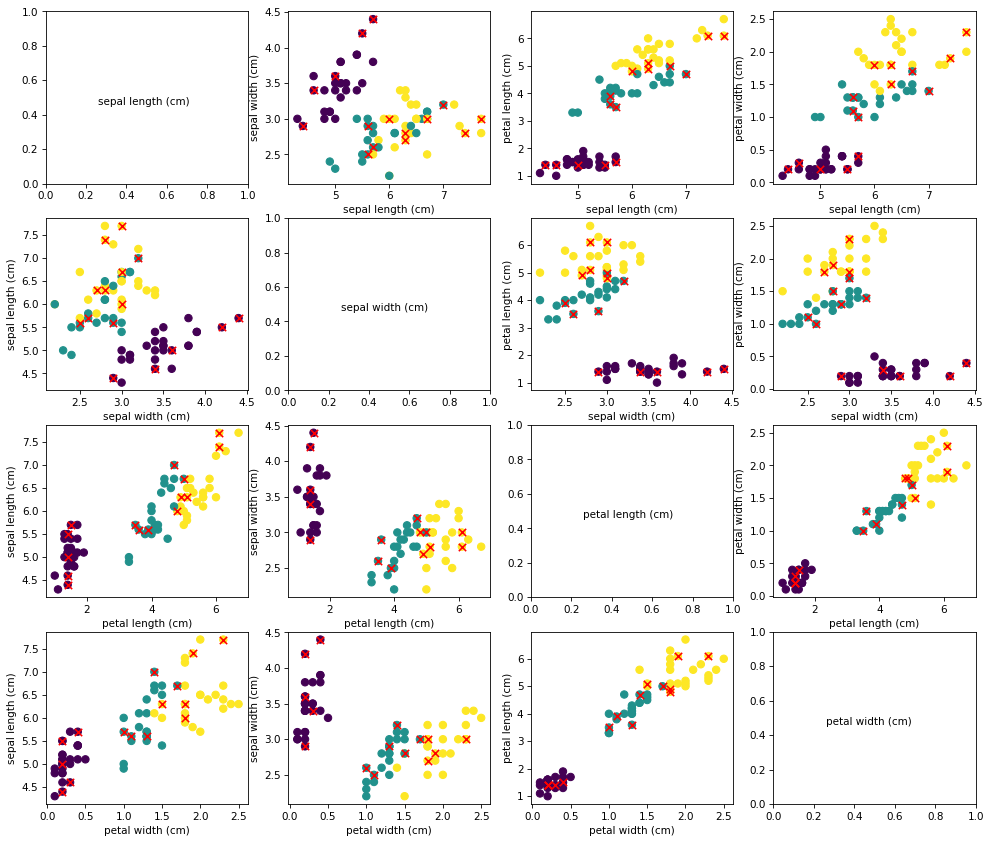

In [58]:
plt.figure(figsize=(16, 14), dpi = 75)
print(f"Points with nonzero \"charge\" (count = {len(indexes)})")
i = 0
for x_ in range(4):
    for y_ in range(4):
        plt.subplot(4, 4, i + 1)
        i += 1
        if x_ == y_:
            plt.text(0.26, 0.46, feature_names[x_])
        else:
            plt.scatter(train_x[:, x_], train_x[:, y_], c = train_y, marker='o', s = 50)
            plt.scatter(train_x[:, x_][indexes], train_x[:, y_][indexes], c = 'r', marker='x', s = 50) # точки с ненулевым зарядом
            plt.xlabel(feature_names[x_])
            plt.ylabel(feature_names[y_])

In [47]:
bad_predictions_array = list()
for i in range(len(test_y)):
    if predict_arr[i] != test_y[i]:
        bad_predictions_array.append(i)
bad_predictions_array

[47, 62, 69]

Points where prediction is wrong (count = 3)


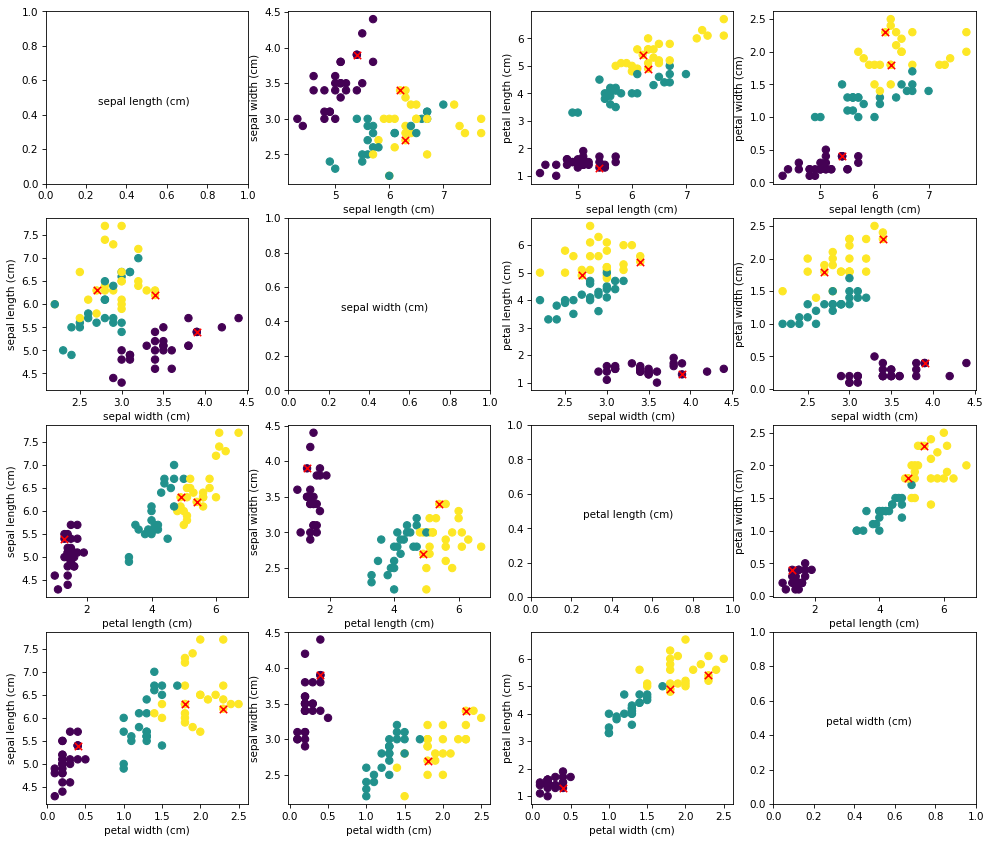

In [59]:
plt.figure(figsize=(16, 14), dpi = 75)
print(f"Points where prediction is wrong (count = {len(bad_predictions_array)})")
i = 0
for x_ in range(4):
    for y_ in range(4):
        plt.subplot(4, 4, i + 1)
        i += 1
        if x_ == y_:
            plt.text(0.26, 0.46, feature_names[x_])
        else:
            plt.scatter(train_x[:, x_], train_x[:, y_], c = train_y, marker='o', s = 50)
            plt.scatter(train_x[:, x_][bad_predictions_array], train_x[:, y_][bad_predictions_array], c = 'r', marker='x', s = 50) # точки с ложными предсказанием
            plt.xlabel(feature_names[x_])
            plt.ylabel(feature_names[y_])